In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dn_estacion = pd.read_csv("Datos_As2/Datos_estacion_AMB_2019-04-11;2019-08-31.csv") #Datos de la estacion amb#
dm_continuos = pd.read_csv("Datos_As2/Datos_mediciones_2019-04-11;2019-08-31.csv") #Datos de las mediciones#

In [3]:
dn_estacion['Date&Time'] = pd.to_datetime(dn_estacion['Date&Time'])
dn_estacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date&Time  3431 non-null   datetime64[ns]
 1   PM2.5      3431 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.7 KB


In [4]:
dm_continuos['fecha_hora_med'] = pd.to_datetime(dm_continuos['fecha_hora_med'])
dm_continuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_hora_med  3329 non-null   datetime64[ns]
 1   valor           3329 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.1 KB


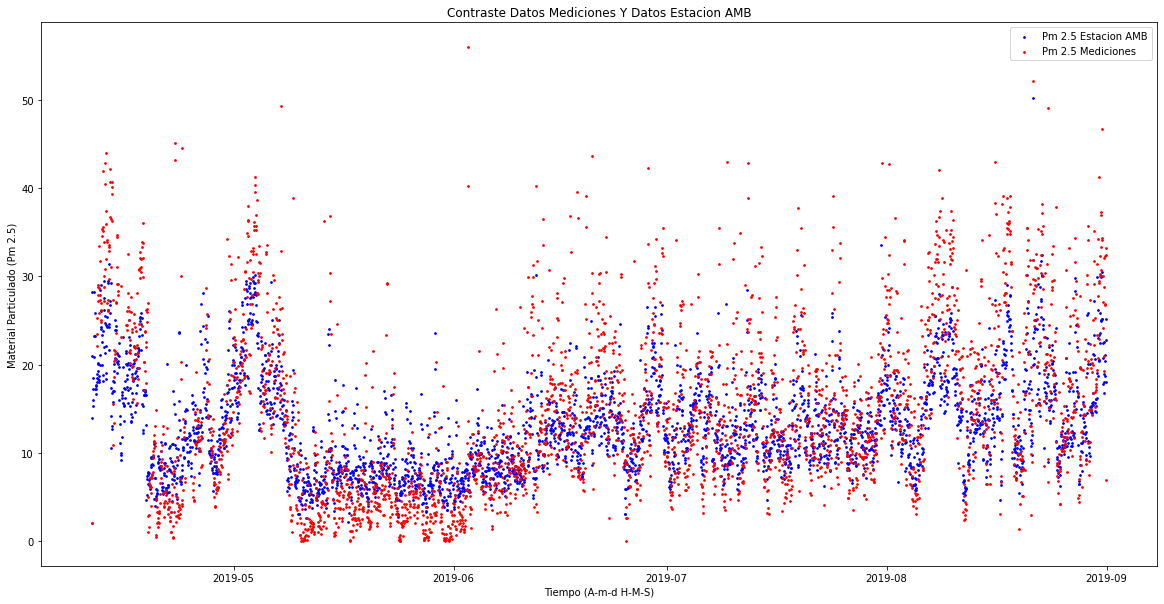

In [5]:
#Contrastamos los datos de las Estaciones AMB y las mediciones#
fig, axs = plt.subplots(figsize = (20,10))
axs.scatter(dn_estacion['Date&Time'], dn_estacion['PM2.5'], c = 'b', s = 3, label = 'Pm 2.5 Estacion AMB')#
axs.scatter(dm_continuos['fecha_hora_med'], dm_continuos['valor'], c = 'r', s = 3, label = 'Pm 2.5 Mediciones')
axs.set_xlabel('Tiempo (A-m-d H-M-S)')
axs.set_ylabel('Material Particulado (Pm 2.5)')
axs.set_title('Contraste Datos Mediciones Y Datos Estacion AMB')
axs.legend()

In [6]:
dm_continuos

,fecha_hora_med,valor
0,2019-04-11 00:00:00,2.000000
1,2019-04-11 00:00:00,2.000000
2,2019-04-11 17:29:20,23.500000
3,2019-04-11 18:02:49,22.083334
4,2019-04-11 19:02:50,25.250000
...,...,...
3324,2019-08-31 19:03:00,26.833332
3325,2019-08-31 20:02:50,32.333336
3326,2019-08-31 21:02:49,32.416668
3327,2019-08-31 22:02:49,33.250000


In [7]:
dn_estacion

,Date&Time,PM2.5
0,2019-04-11 00:00:00,28.2
1,2019-04-11 01:00:00,21.0
2,2019-04-11 02:00:00,13.9
3,2019-04-11 03:00:00,15.3
4,2019-04-11 04:00:00,16.0
...,...,...
3426,2019-08-31 19:00:00,20.4
3427,2019-08-31 20:00:00,18.7
3428,2019-08-31 21:00:00,22.8
3429,2019-08-31 22:00:00,25.2


# Resample por horas

## Resample por minutos para los datos de las mediciones

In [8]:
dm_continuos['fecha_hora_med'] = pd.to_datetime(dm_continuos['fecha_hora_med'])
dm_continuos['valor'] = dm_continuos['valor'].astype(float)
dm_continuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_hora_med  3329 non-null   datetime64[ns]
 1   valor           3329 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.1 KB


In [9]:
dm_c_index = dm_continuos.set_index('fecha_hora_med')
dm_c_index

,valor
fecha_hora_med,
2019-04-11 00:00:00,2.000000
2019-04-11 00:00:00,2.000000
2019-04-11 17:29:20,23.500000
2019-04-11 18:02:49,22.083334
2019-04-11 19:02:50,25.250000
...,...
2019-08-31 19:03:00,26.833332
2019-08-31 20:02:50,32.333336
2019-08-31 21:02:49,32.416668


In [10]:
dm_ci_min = dm_c_index.resample('min').mean()
dm_ci_min

,valor
fecha_hora_med,
2019-04-11 00:00:00,2.000000
2019-04-11 00:01:00,NaN
2019-04-11 00:02:00,NaN
2019-04-11 00:03:00,NaN
2019-04-11 00:04:00,NaN
...,...
2019-08-31 22:59:00,NaN
2019-08-31 23:00:00,NaN
2019-08-31 23:01:00,NaN


In [11]:
dm_ci_min["2019-04-11 17:00:00":"2019-08-31 23:03:00"]

,valor
fecha_hora_med,
2019-04-11 17:00:00,NaN
2019-04-11 17:01:00,NaN
2019-04-11 17:02:00,NaN
2019-04-11 17:03:00,NaN
2019-04-11 17:04:00,NaN
...,...
2019-08-31 22:59:00,NaN
2019-08-31 23:00:00,NaN
2019-08-31 23:01:00,NaN


## Resample por horas para los datos de Estacion AMB

In [12]:
dn_estacion

,Date&Time,PM2.5
0,2019-04-11 00:00:00,28.2
1,2019-04-11 01:00:00,21.0
2,2019-04-11 02:00:00,13.9
3,2019-04-11 03:00:00,15.3
4,2019-04-11 04:00:00,16.0
...,...,...
3426,2019-08-31 19:00:00,20.4
3427,2019-08-31 20:00:00,18.7
3428,2019-08-31 21:00:00,22.8
3429,2019-08-31 22:00:00,25.2


In [13]:
dn_estacion['Date&Time'] = pd.to_datetime(dn_estacion['Date&Time'])
dn_estacion['PM2.5'] = dn_estacion['PM2.5'].astype(float)
dn_estacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date&Time  3431 non-null   datetime64[ns]
 1   PM2.5      3431 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.7 KB


In [14]:
dn_e_index = dn_estacion.set_index('Date&Time')
dn_e_index

,PM2.5
Date&Time,
2019-04-11 00:00:00,28.2
2019-04-11 01:00:00,21.0
2019-04-11 02:00:00,13.9
2019-04-11 03:00:00,15.3
2019-04-11 04:00:00,16.0
...,...
2019-08-31 19:00:00,20.4
2019-08-31 20:00:00,18.7
2019-08-31 21:00:00,22.8


In [21]:
dn_ei_h = dn_e_index.resample('H').mean()
dn_ei_h

,PM2.5
Date&Time,
2019-04-11 00:00:00,28.2
2019-04-11 01:00:00,21.0
2019-04-11 02:00:00,13.9
2019-04-11 03:00:00,15.3
2019-04-11 04:00:00,16.0
...,...
2019-08-31 19:00:00,20.4
2019-08-31 20:00:00,18.7
2019-08-31 21:00:00,22.8


## Comparacion dataframes coincidentes para datos de estacion y datos mediciones

In [22]:
dn_ei_h = dn_ei_h["2019-04-11 17:00:00":"2019-08-31 23:00:00"]
print(dn_ei_h)
dm_ci_min = dm_ci_min["2019-04-11 17:00:00":"2019-08-31 23:03:00"]
dm_ci_min_c = dm_ci_min
print(dm_ci_min_c)

                     PM2.5
Date&Time                 
2019-04-11 17:00:00   18.5
2019-04-11 18:00:00   18.9
2019-04-11 19:00:00   18.0
2019-04-11 20:00:00   18.4
2019-04-11 21:00:00   19.3
...                    ...
2019-08-31 19:00:00   20.4
2019-08-31 20:00:00   18.7
2019-08-31 21:00:00   22.8
2019-08-31 22:00:00   25.2
2019-08-31 23:00:00   18.0

[3415 rows x 1 columns]
                        valor  Xm
fecha_hora_med                   
2019-04-11 17:00:00       NaN NaN
2019-04-11 17:01:00       NaN NaN
2019-04-11 17:02:00       NaN NaN
2019-04-11 17:03:00       NaN NaN
2019-04-11 17:04:00       NaN NaN
...                       ...  ..
2019-08-31 22:59:00       NaN NaN
2019-08-31 23:00:00       NaN NaN
2019-08-31 23:01:00       NaN NaN
2019-08-31 23:02:00       NaN NaN
2019-08-31 23:03:00  6.916667 NaN

[204844 rows x 2 columns]


In [23]:
dn_ei_h_c = dn_ei_h

## Grafico datos resampleados

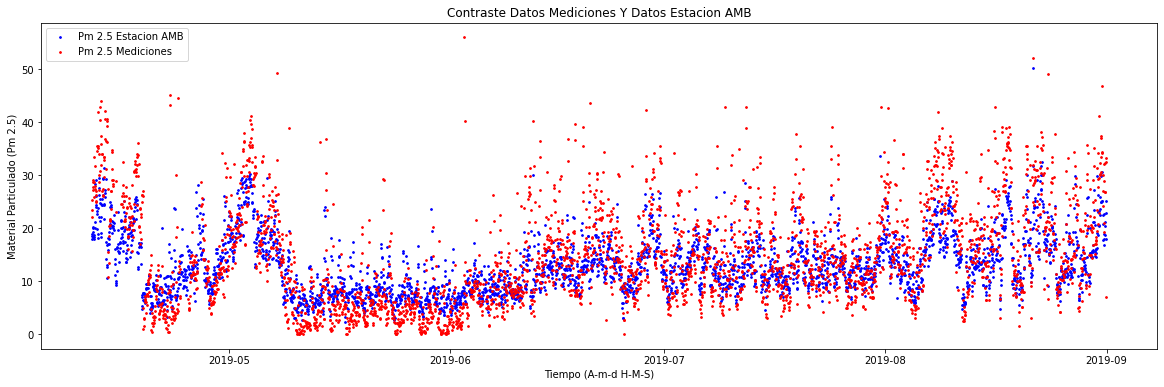

In [24]:
#Contrastamos los datos de las Estaciones AMB y las mediciones#
fig, axs = plt.subplots(figsize = (20,6))
axs.scatter(dn_ei_h_c.index, dn_ei_h_c['PM2.5'], c = 'b', s = 3, label = 'Pm 2.5 Estacion AMB')#
axs.scatter(dm_ci_min_c.index, dm_ci_min_c['valor'], c = 'r', s = 3, label = 'Pm 2.5 Mediciones')
axs.set_xlabel('Tiempo (A-m-d H-M-S)')
axs.set_ylabel('Material Particulado (Pm 2.5)')
axs.set_title('Contraste Datos Mediciones Y Datos Estacion AMB')
axs.legend()

## Rolling de datos

In [25]:
dm_ci_min_copia = dm_ci_min

In [26]:
## Definimos los saltos de solapamiento que sean significantes para el calculo de la distancia
arr = []
step = []
for i in range(1,60):
    dm_ci_min_copia['Xm'] = dm_ci_min_copia['valor'].rolling(window=60, step=i, min_periods=1).mean()
    
    dm_ci_min_copia_h = dm_ci_min_copia.resample('H').mean()
    
    dcomparables = pd.merge(dn_ei_h_c,dm_ci_min_copia_h, how ="outer", left_index = True, right_index = True)
    
    dcomparables = dcomparables.dropna()
    
    distancia = np.linalg.norm(np.array(dcomparables['PM2.5'])-np.array(dcomparables['Xm']))
    
    arr.append(distancia)
    
    step.append(i)


print(arr)

[406.3602619854195, 406.50236659462877, 404.50501203171575, 402.9836127282746, 401.22751865301683, 399.5528911657786, 407.31376371960613, 403.58555005115204, 405.702571238353, 393.5827660570228, 406.3268834041307, 391.09574820139767, 407.4167500095462, 407.7901294545094, 387.88905926970347, 403.7636036559451, 408.2456520169515, 403.13315208089176, 406.06757062579896, 384.24697399274845, 407.1015648632679, 405.47112871619316, 409.3991228852404, 396.97329044380587, 406.9015238183033, 407.97350124480914, 408.3538757592632, 407.1290035192466, 408.2506150539428, 383.0611283072624, 407.78105682220496, 405.45054731398267, 404.4122963913019, 407.8420253097838, 407.0003219859402, 400.8860431289496, 409.6072701234949, 405.9859181676557, 407.7432430949844, 396.639193265565, 409.49908217094327, 406.7817743352272, 409.20685203087714, 404.30925559434166, 400.81739227551145, 410.4234923363687, 410.6734037747615, 401.5401292381503, 408.8986716333268, 407.10426915752987, 407.7950112468954, 407.38600251

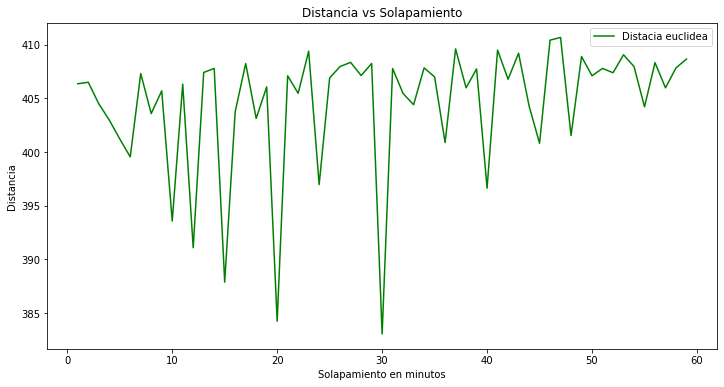

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(step,arr, c='g', label = 'Distacia euclidea')
ax.set_xlabel('Solapamiento en minutos')
ax.set_ylabel('Distancia')
ax.set_title('Distancia vs Solapamiento')
ax.legend()

## Diferencia entre datos solapados y no solapados

In [28]:
dm_ci_min_c['Xm'] = dm_ci_min_c['valor'].rolling(window = 60, step=30, min_periods = 1).mean()

In [29]:
dm_ci_min_c_h = dm_ci_min_c.resample('H').mean()

In [30]:
dm_ci_min_c_h = dm_ci_min_c_h.dropna()
dm_ci_min_c_h

,valor,Xm
fecha_hora_med,,
2019-04-11 17:00:00,23.500000,23.500000
2019-04-11 18:00:00,22.083334,22.791667
2019-04-11 19:00:00,25.250000,23.666667
2019-04-11 20:00:00,28.749998,26.999999
2019-04-11 21:00:00,29.000000,28.874999
...,...,...
2019-08-31 19:00:00,26.833332,26.791667
2019-08-31 20:00:00,32.333336,29.583334
2019-08-31 21:00:00,32.416668,32.375002


In [31]:
#Distancia entre datos sin solapamientos y datos con solapamiento#
distancia = np.linalg.norm(np.array(dm_ci_min_c_h['valor'])-np.array(dm_ci_min_c_h['Xm']))
distancia

172.95604512135026

## Calculo distancia

### Calculo Distancia datos sin solapamiento

In [32]:
dm_ci_min_c_h

,valor,Xm
fecha_hora_med,,
2019-04-11 17:00:00,23.500000,23.500000
2019-04-11 18:00:00,22.083334,22.791667
2019-04-11 19:00:00,25.250000,23.666667
2019-04-11 20:00:00,28.749998,26.999999
2019-04-11 21:00:00,29.000000,28.874999
...,...,...
2019-08-31 19:00:00,26.833332,26.791667
2019-08-31 20:00:00,32.333336,29.583334
2019-08-31 21:00:00,32.416668,32.375002


In [33]:
#Unir los dataframes en los intervalos en que el promedio movil sea continuo para ambos set
dnm = pd.merge(dn_ei_h_c,dm_ci_min_c_h, how ="outer", left_index = True, right_index = True)

In [34]:
dnm = dnm.dropna()
dnm

,PM2.5,valor,Xm
2019-04-11 17:00:00,18.5,23.500000,23.500000
2019-04-11 18:00:00,18.9,22.083334,22.791667
2019-04-11 19:00:00,18.0,25.250000,23.666667
2019-04-11 20:00:00,18.4,28.749998,26.999999
2019-04-11 21:00:00,19.3,29.000000,28.874999
...,...,...,...
2019-08-31 19:00:00,20.4,26.833332,26.791667
2019-08-31 20:00:00,18.7,32.333336,29.583334
2019-08-31 21:00:00,22.8,32.416668,32.375002
2019-08-31 22:00:00,25.2,33.250000,32.833334


In [35]:
#Calculo de errores por distancia
distancia_sin_solapamiento = np.linalg.norm(np.array(dnm['PM2.5'])-np.array(dnm['valor']))
distancia_sin_solapamiento

410.5266870113199

### Calculo distancia con solapamiento

In [36]:
#Calculo de errores por distancia
distancia_solapamiento = np.linalg.norm(np.array(dnm['PM2.5'])-np.array(dnm['Xm']))
distancia_solapamiento

383.0611283072624

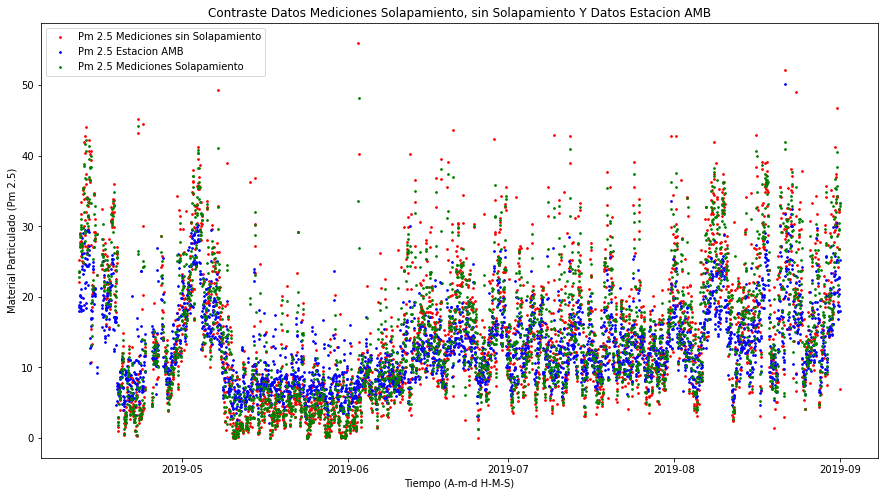

In [37]:
fig, axs = plt.subplots(figsize = (15,8))
axs.scatter(dnm.index, dnm['valor'], c = 'r', s = 3, label = 'Pm 2.5 Mediciones sin Solapamiento')
axs.scatter(dnm.index, dnm['PM2.5'], c = 'b', s = 3, label = 'Pm 2.5 Estacion AMB')
axs.scatter(dnm.index, dnm['Xm'], c = 'g', s = 3, label = 'Pm 2.5 Mediciones Solapamiento')
axs.set_xlabel('Tiempo (A-m-d H-M-S)')
axs.set_ylabel('Material Particulado (Pm 2.5)')
axs.set_title('Contraste Datos Mediciones Solapamiento, sin Solapamiento Y Datos Estacion AMB')
axs.legend()

## Regresión lineal

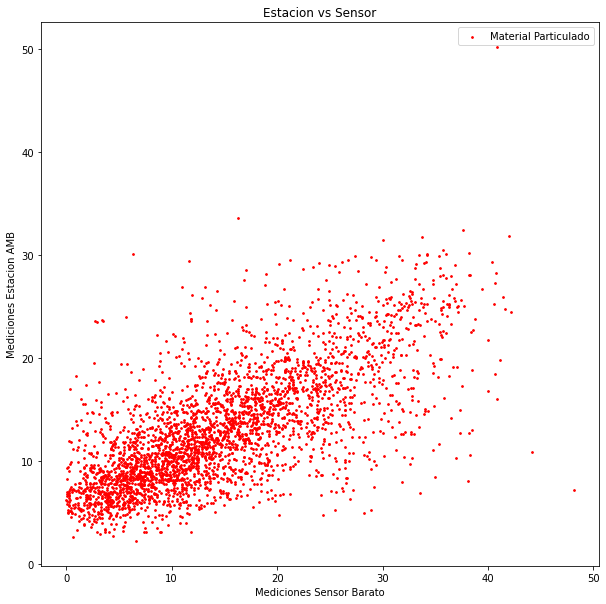

In [38]:
fig, axs = plt.subplots(figsize = (10,10))
axs.scatter(dnm['Xm'], dnm['PM2.5'], c = 'r', s = 3, label = 'Material Particulado')
axs.set_xlabel('Mediciones Sensor Barato')
axs.set_ylabel('Mediciones Estacion AMB')
axs.set_title('Estacion vs Sensor')
axs.legend()

In [39]:
dnm

,PM2.5,valor,Xm
2019-04-11 17:00:00,18.5,23.500000,23.500000
2019-04-11 18:00:00,18.9,22.083334,22.791667
2019-04-11 19:00:00,18.0,25.250000,23.666667
2019-04-11 20:00:00,18.4,28.749998,26.999999
2019-04-11 21:00:00,19.3,29.000000,28.874999
...,...,...,...
2019-08-31 19:00:00,20.4,26.833332,26.791667
2019-08-31 20:00:00,18.7,32.333336,29.583334
2019-08-31 21:00:00,22.8,32.416668,32.375002
2019-08-31 22:00:00,25.2,33.250000,32.833334


In [65]:
Xi = np.array(dnm['Xm'])
Yi = np.array(dnm['PM2.5'])
print(Xi)
print(Yi)
x_y = Xi * Yi
print(x_y)
x_x = Xi * Xi

[23.5        22.79166698 23.66666698 ... 32.37500191 32.83333397
 33.25      ]
[18.5 18.9 18.  ... 22.8 25.2 18. ]
[434.75       430.76250601 426.00000572 ... 738.15004349 827.40001602
 598.5       ]


In [66]:
a = ((len(Xi) * sum(x_y)) - (sum(Xi)*sum(Yi)))/((len(Xi) * sum(x_x)) - (sum(Xi) * sum(Xi)))
print("Valor de a:",a)

b = (sum(Yi) - a* sum(Xi))/len(Xi)
print('Valor de b:', b)

Valor de a: 0.441006730235913
Valor de b: 6.4836189612493


In [67]:
fx = (a*dnm['Xm']) + b

In [68]:
np.array(dnm['Xm'])

array([23.5       , 22.79166698, 23.66666698, ..., 32.37500191,
       32.83333397, 33.25      ])

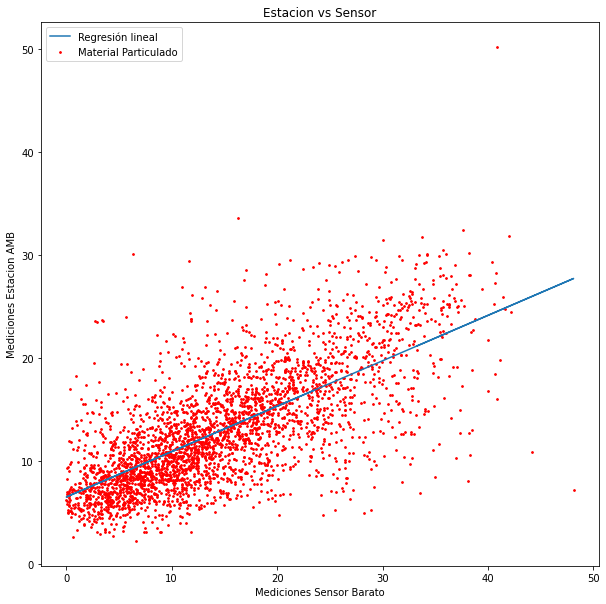

In [69]:
fig, axs = plt.subplots(figsize = (10,10))
axs.scatter(dnm['Xm'], dnm['PM2.5'], c = 'r', s = 3, label = 'Material Particulado')
axs.plot(dnm['Xm'], fx, label = 'Regresión lineal')
axs.set_xlabel('Mediciones Sensor Barato')
axs.set_ylabel('Mediciones Estacion AMB')
axs.set_title('Estacion vs Sensor')
axs.legend()

## Calculamos la distancia de los puntos a la recta en funcion de la cantidad de datos

In [70]:
dnm_i = dnm.reset_index()
dnm_i

,index,PM2.5,valor,Xm
0,2019-04-11 17:00:00,18.5,23.500000,23.500000
1,2019-04-11 18:00:00,18.9,22.083334,22.791667
2,2019-04-11 19:00:00,18.0,25.250000,23.666667
3,2019-04-11 20:00:00,18.4,28.749998,26.999999
4,2019-04-11 21:00:00,19.3,29.000000,28.874999
...,...,...,...,...
3320,2019-08-31 19:00:00,20.4,26.833332,26.791667
3321,2019-08-31 20:00:00,18.7,32.333336,29.583334
3322,2019-08-31 21:00:00,22.8,32.416668,32.375002
3323,2019-08-31 22:00:00,25.2,33.250000,32.833334


In [71]:
d = []
num = []
for i in range(1,101):
    n = int(i*3325/100)
    regresion = dnm_i[0:n]
    Xi = np.array(regresion['Xm'])
    Yi = np.array(regresion['PM2.5'])
    x_y = Xi * Yi
    x_x = Xi * Xi
    a = ((len(Xi) * sum(x_y)) - (sum(Xi)*sum(Yi)))/((len(Xi) * sum(x_x)) - (sum(Xi) * sum(Xi)))
    b = (sum(Yi) - a* sum(Xi))/len(Xi)
    fx = (a*dnm['Xm']) + b
    dis = np.linalg.norm(np.array(dnm['PM2.5'])-np.array(fx))
    
    num.append(n)
    d.append(dis)

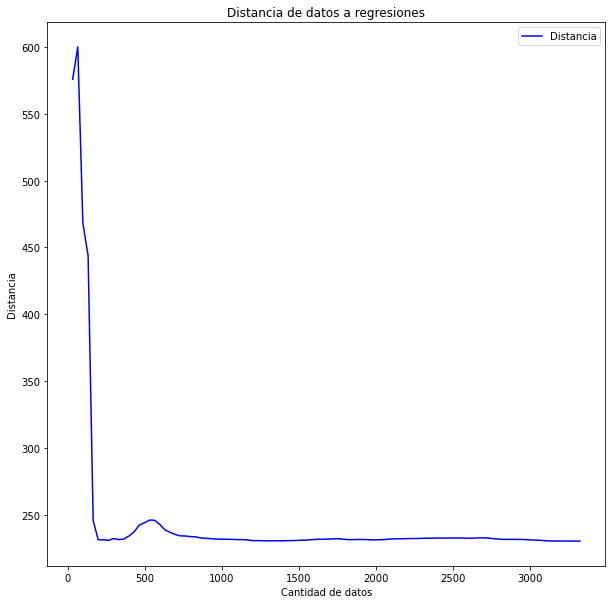

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(num,d, c='b', label = 'Distancia')
ax.set_xlabel('Cantidad de datos')
ax.set_ylabel('Distancia')
ax.set_title('Distancia de datos a regresiones')
ax.legend()

In [73]:
int(4*3325/10)

1330

## Regresion lineal para los primeros 1000 datos

In [74]:
regresion = dnm_i[0:1000]
Xi = np.array(regresion['Xm'])
Yi = np.array(regresion['PM2.5'])
x_y = Xi * Yi
x_x = Xi * Xi
a = ((len(Xi) * sum(x_y)) - (sum(Xi)*sum(Yi)))/((len(Xi) * sum(x_x)) - (sum(Xi) * sum(Xi)))
b = (sum(Yi) - a* sum(Xi))/len(Xi)
fx = (a*dnm['Xm']) + b

In [75]:
a

0.468937709164757

In [76]:
b

6.444075501620583

In [77]:
dis = np.linalg.norm(np.array(dnm['PM2.5'])-np.array(fx))
dis

231.81745644240888

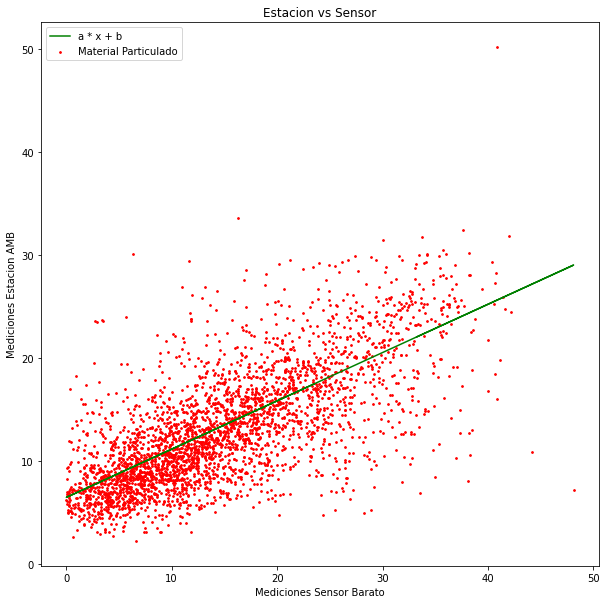

In [78]:
fig, axs = plt.subplots(figsize = (10,10))
axs.scatter(dnm['Xm'], dnm['PM2.5'], c = 'r', s = 3, label = 'Material Particulado')
axs.plot(dnm['Xm'], fx, label = 'a * x + b', c='g')
axs.set_xlabel('Mediciones Sensor Barato')
axs.set_ylabel('Mediciones Estacion AMB')
axs.set_title('Estacion vs Sensor')
axs.legend()

In [54]:
calibraciones = np.array(fx)

In [55]:
df_calibraciones = pd.merge(dnm['PM2.5'],fx, how ="outer", left_index = True, right_index = True)
df_calibraciones

,PM2.5,Xm
2019-04-11 17:00:00,18.5,17.464112
2019-04-11 18:00:00,18.9,17.131948
2019-04-11 19:00:00,18.0,17.542268
2019-04-11 20:00:00,18.4,19.105393
2019-04-11 21:00:00,19.3,19.984651
...,...,...
2019-08-31 19:00:00,20.4,19.007698
2019-08-31 20:00:00,18.7,20.316816
2019-08-31 21:00:00,22.8,21.625935
2019-08-31 22:00:00,25.2,21.840864


In [56]:
df_calibraciones = df_calibraciones.sort_values(by = 'PM2.5')
df_calibraciones

,PM2.5,Xm
2019-05-17 04:00:00,2.2,9.550788
2019-05-11 04:00:00,2.6,6.737162
2019-05-24 04:00:00,2.7,8.534756
2019-05-24 03:00:00,2.9,7.929045
2019-05-24 02:00:00,3.1,7.792271
...,...,...
2019-08-22 18:00:00,31.7,22.270724
2019-08-21 16:00:00,31.8,26.119920
2019-08-22 22:00:00,32.4,24.107396
2019-07-31 07:00:00,33.6,14.083852


In [57]:
regresion = df_calibraciones
Xi = np.array(regresion['Xm'])
Yi = np.array(regresion['PM2.5'])
x_y = Xi * Yi
x_x = Xi * Xi
a = ((len(Xi) * sum(x_y)) - (sum(Xi)*sum(Yi)))/((len(Xi) * sum(x_x)) - (sum(Xi) * sum(Xi)))
b = (sum(Yi) - a* sum(Xi))/len(Xi)
fx2 = (a*regresion['Xm']) + b

In [58]:
a

0.9404377630909957

In [59]:
b

0.4233670113156738

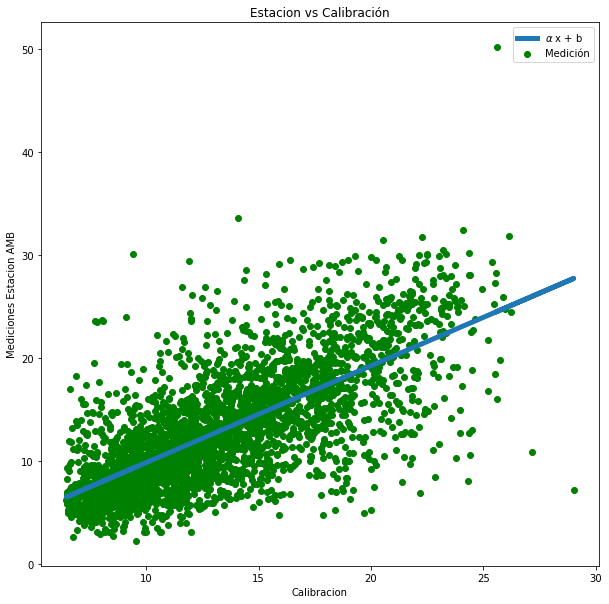

In [60]:
fig, axs = plt.subplots(figsize = (10,10))
axs.scatter(df_calibraciones['Xm'], df_calibraciones['PM2.5'], c = 'g', label = 'Medición')
axs.plot(df_calibraciones['Xm'], fx2, label = r"$\alpha$ x + b", linewidth = 5)
axs.set_xlabel('Calibracion')
axs.set_ylabel('Mediciones Estacion AMB')
axs.set_title('Estacion vs Calibración')
axs.legend()